In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [66]:
path = kagglehub.dataset_download("mrmars1010/banana-quality-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\KarthikKodam(Quadran\.cache\kagglehub\datasets\mrmars1010\banana-quality-dataset\versions\1


In [67]:
x = pd.read_csv(path + '\\' + os.listdir(path)[0])
x.shape

(1000, 16)

In [68]:
x.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,1,Manzano,Colombia,1.88,Processing,2.11,Turning,16.83,3.53,21.44,146.92,2023-10-16,13.7,58.2,2440.5,183.6
1,2,Plantain,Guatemala,2.42,Processing,4.25,Ripe,16.73,4.09,26.11,160.48,2023-10-14,5.1,280.2,2374.6,109.8
2,3,Burro,Ecuador,3.57,Premium,6.24,Overripe,21.34,1.63,25.20,225.27,2023-09-08,17.7,1246.9,1191.5,147.7
3,4,Manzano,Ecuador,2.21,Processing,5.39,Ripe,16.75,3.31,13.08,137.80,2023-10-07,13.0,1150.2,2845.1,92.8
4,5,Red Dacca,Ecuador,2.35,Processing,5.84,Ripe,16.90,3.07,12.98,227.84,2023-10-02,4.8,526.0,2136.9,129.7


In [69]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [70]:
x.duplicated().value_counts()

False    1000
Name: count, dtype: int64

In [71]:
x.isna().sum()

sample_id             0
variety               0
region                0
quality_score         0
quality_category      0
ripeness_index        0
ripeness_category     0
sugar_content_brix    0
firmness_kgf          0
length_cm             0
weight_g              0
harvest_date          0
tree_age_years        0
altitude_m            0
rainfall_mm           0
soil_nitrogen_ppm     0
dtype: int64

In [72]:
a = x.select_dtypes(include='object').columns
a

Index(['variety', 'region', 'quality_category', 'ripeness_category',
       'harvest_date'],
      dtype='object')

In [73]:
b = x.select_dtypes(exclude='object').columns
b

Index(['sample_id', 'quality_score', 'ripeness_index', 'sugar_content_brix',
       'firmness_kgf', 'length_cm', 'weight_g', 'tree_age_years', 'altitude_m',
       'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')

## **Building ML model :**
* *Step -1 :* Data Preprocessing
* *Step -2 :* Feature Selection
* *Step -3 :* Assigning Target and Predictor
* *Step -4 :* Train Test and Split
* *Step -5 :* Model Building
* *Step -6 :* Hyper Parameter Tuning
* *Step -7 :* 

In [74]:
x['quality_category'].value_counts()

quality_category
Processing    506
Good          434
Unripe         35
Premium        25
Name: count, dtype: int64

### **Data Preprocessing :**


In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

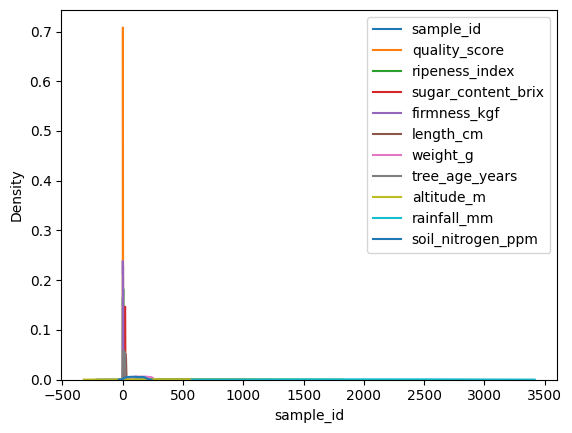

In [76]:
for i in b:
  sns.kdeplot(x=x[i], label=i)
  plt.legend()

In [77]:
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers= [('cat',OrdinalEncoder(),[1,2,4,6,11]),('num',StandardScaler(), [0,3,5,7,8,9,10,12,13,14,15])])
x_trans = ct.fit_transform(x)

In [78]:
x_trans_df = pd.DataFrame(x_trans,columns= x.columns)
x_trans_df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,5.0,1.0,2.0,3.0,45.0,-1.730320,-1.082350,-1.102626,-0.829400,0.638798,0.271721,-0.362627,0.541038,-1.557632,0.828641,1.478299
1,6.0,4.0,2.0,2.0,43.0,-1.726856,-0.083531,0.118602,-0.878570,1.073376,1.086240,-0.086672,-1.108701,-1.037919,0.711835,0.100944
2,1.0,3.0,1.0,1.0,7.0,-1.723391,2.043584,1.254230,1.388129,-0.835662,0.927522,1.231846,1.308358,1.225172,-1.385170,0.808285
3,5.0,3.0,2.0,2.0,36.0,-1.719927,-0.471961,0.769163,-0.868736,0.468071,-1.186389,-0.548225,0.406757,0.998792,1.545781,-0.216332
4,7.0,3.0,2.0,2.0,31.0,-1.716463,-0.213007,1.025963,-0.794982,0.281824,-1.203830,1.284148,-1.166250,-0.462490,0.290520,0.472345


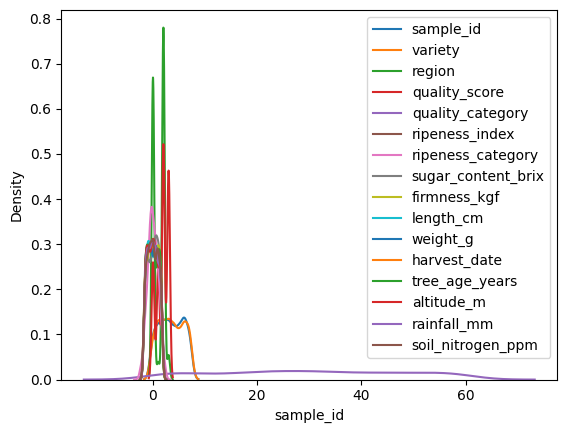

In [79]:
for i in x_trans_df.columns:
  sns.kdeplot(x=x_trans_df[i], label=i)
  plt.legend()

### **Feature Selection :**
1. Correlation
2. Chi Square Test
3. Mutual Information
4. Varaiance Threshold
5. Recursive Feature Elimination
6. Decision Tree

#### Correlation

In [23]:
x_trans_df.head()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
0,5.0,1.0,2.0,3.0,45.0,-1.730320,-1.082350,-1.102626,-0.829400,0.638798,0.271721,-0.362627,0.541038,-1.557632,0.828641,1.478299
1,6.0,4.0,2.0,2.0,43.0,-1.726856,-0.083531,0.118602,-0.878570,1.073376,1.086240,-0.086672,-1.108701,-1.037919,0.711835,0.100944
2,1.0,3.0,1.0,1.0,7.0,-1.723391,2.043584,1.254230,1.388129,-0.835662,0.927522,1.231846,1.308358,1.225172,-1.385170,0.808285
3,5.0,3.0,2.0,2.0,36.0,-1.719927,-0.471961,0.769163,-0.868736,0.468071,-1.186389,-0.548225,0.406757,0.998792,1.545781,-0.216332
4,7.0,3.0,2.0,2.0,31.0,-1.716463,-0.213007,1.025963,-0.794982,0.281824,-1.203830,1.284148,-1.166250,-0.462490,0.290520,0.472345


In [24]:
x_trans_df.corr()

,sample_id,variety,region,quality_score,quality_category,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g,harvest_date,tree_age_years,altitude_m,rainfall_mm,soil_nitrogen_ppm
sample_id,1.000000,-0.009756,0.020549,-0.014496,0.036358,-0.025567,-0.034067,-0.037727,0.014268,0.046244,-0.029350,0.002450,-0.042247,0.034844,0.061365,-0.009109
variety,-0.009756,1.000000,0.002284,-0.004466,0.002169,0.013092,-0.016948,-0.032028,0.001048,-0.005317,-0.004079,-0.050780,-0.070164,-0.022104,-0.003988,-0.009190
region,0.020549,0.002284,1.000000,-0.060183,0.005469,-0.011353,-0.806702,-0.562799,-0.489015,0.062550,-0.336258,0.035814,-0.030373,-0.027246,-0.024781,0.027776
quality_score,-0.014496,-0.004466,-0.060183,1.000000,-0.030691,0.017930,0.042417,0.081862,-0.017213,0.029752,-0.001486,-0.013461,0.003809,-0.027908,0.011765,-0.026176
quality_category,0.036358,0.002169,0.005469,-0.030691,1.000000,-0.029758,-0.012819,-0.027630,0.010005,0.035011,0.001765,0.025482,-0.009626,-0.034054,-0.005762,0.068955
ripeness_index,-0.025567,0.013092,-0.011353,0.017930,-0.029758,1.000000,-0.012476,-0.038825,0.015799,-0.003484,0.013642,0.016341,0.006301,-0.028854,-0.006547,-0.023268
ripeness_category,-0.034067,-0.016948,-0.806702,0.042417,-0.012819,-0.012476,1.000000,0.679778,0.602842,-0.067945,0.439203,-0.014571,0.022158,0.005179,0.011419,-0.039381
sugar_content_brix,-0.037727,-0.032028,-0.562799,0.081862,-0.027630,-0.038825,0.679778,1.000000,0.027318,-0.005850,0.032862,0.030081,0.042175,0.050076,0.003166,-0.065418
firmness_kgf,0.014268,0.001048,-0.489015,-0.017213,0.010005,0.015799,0.602842,0.027318,1.000000,-0.013572,-0.008925,-0.020328,-0.028472,-0.046773,-0.005169,0.013128
length_cm,0.046244,-0.005317,0.062550,0.029752,0.035011,-0.003484,-0.067945,-0.005850,-0.013572,1.000000,-0.044788,0.040061,-0.016933,-0.022841,0.025458,0.004460


<Axes: >

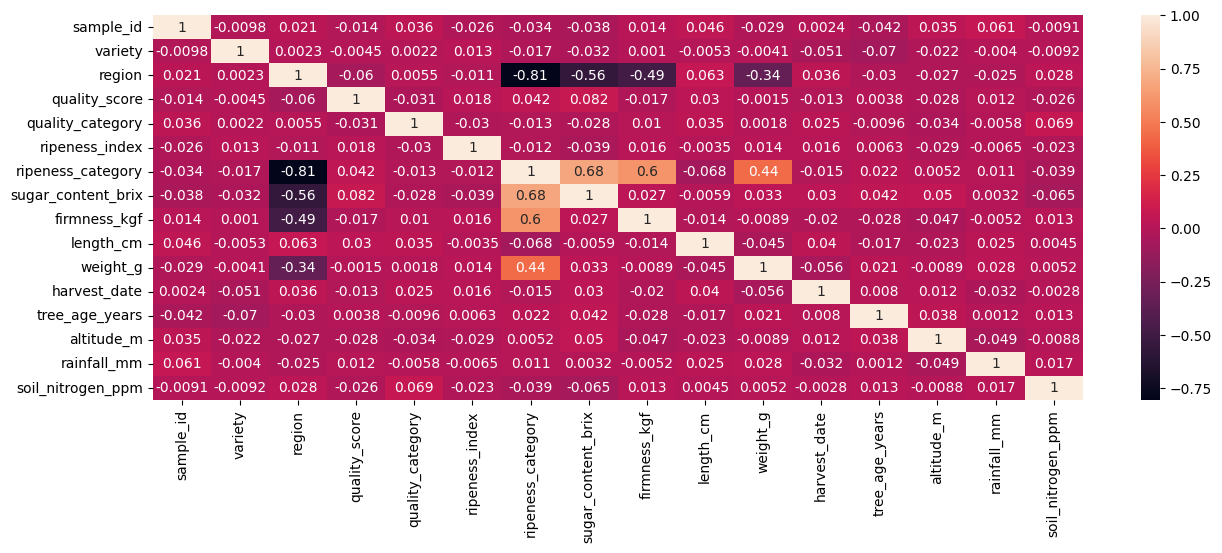

In [25]:
plt.figure(figsize=(15,5))
sns.heatmap(x_trans_df.corr(),annot = True)

#### Chi Square Test

In [26]:
X = x.drop('quality_category',axis=1)
y = x['quality_category']

In [27]:
X.shape, y.shape

((1000, 15), (1000,))

In [28]:
X_num = X.select_dtypes(exclude='object')

In [29]:
from sklearn.feature_selection import chi2 , SelectKBest
sel_feat = SelectKBest(chi2, k= 7)
sel_feat.fit_transform(X_num,y)

imp_feat = X_num.columns[sel_feat.get_support()]
imp_feat

Index(['sample_id', 'quality_score', 'ripeness_index', 'sugar_content_brix',
       'length_cm', 'altitude_m', 'rainfall_mm'],
      dtype='object')

#### Mutual information

In [30]:
X_trans1 = x_trans_df.drop('quality_category',axis= 1)

In [31]:
from sklearn.feature_selection import mutual_info_classif
sel_feat = mutual_info_classif(X_trans1,y)
sel_feat

array([0.        , 0.00505698, 0.91802331, 0.19442133, 0.00202254,
       0.91391378, 0.23199664, 0.16953896, 0.00272125, 0.06141979,
       0.        , 0.        , 0.        , 0.02545597, 0.        ])

In [32]:
imp_feat = pd.Series(sel_feat)
imp_feat.index = X_trans1.columns
imp_feat.sort_values(ascending=False)

region                0.918023
ripeness_category     0.913914
sugar_content_brix    0.231997
quality_score         0.194421
firmness_kgf          0.169539
weight_g              0.061420
rainfall_mm           0.025456
variety               0.005057
length_cm             0.002721
ripeness_index        0.002023
sample_id             0.000000
harvest_date          0.000000
tree_age_years        0.000000
altitude_m            0.000000
soil_nitrogen_ppm     0.000000
dtype: float64

#### Variance threshold

In [33]:
from sklearn.feature_selection import VarianceThreshold
sel_feat = VarianceThreshold(threshold= 1)
sel_feat.fit_transform(X_trans1,y)

imp_feat = X_trans1.columns[sel_feat.get_support()]
imp_feat

Index(['sample_id', 'variety', 'region', 'quality_score', 'ripeness_category',
       'sugar_content_brix', 'firmness_kgf', 'length_cm', 'harvest_date',
       'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')

#### Recursive Feature Extraction
* LogisticRegression  - ['region', 'quality_score', 'ripeness_index', 'ripeness_category','sugar_content_brix', 'firmness_kgf', 'weight_g']
* DecisionTreeClassifier  - ['region', 'weight_g', 'harvest_date', 'tree_age_years', 'altitude_m','rainfall_mm', 'soil_nitrogen_ppm']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()
sel_feat = RFE(lr , n_features_to_select= 7)
sel_feat.fit_transform(X_trans1,y)

imp_feat = X_trans1.columns[sel_feat.get_support()]
imp_feat

Index(['region', 'quality_score', 'ripeness_index', 'ripeness_category',
       'sugar_content_brix', 'firmness_kgf', 'weight_g'],
      dtype='object')

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
dt = DecisionTreeClassifier()
sel_feat = RFE(dt , n_features_to_select= 7)
sel_feat.fit_transform(X_trans1,y)

imp_feat = X_trans1.columns[sel_feat.get_support()]
imp_feat

Index(['region', 'weight_g', 'harvest_date', 'tree_age_years', 'altitude_m',
       'rainfall_mm', 'soil_nitrogen_ppm'],
      dtype='object')

#### Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 6)

dt.fit(X_trans1,y)
sel_feat = dt.feature_importances_
sel_feat

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
imp_feat = pd.Series(sel_feat)
imp_feat.index = X_trans1.columns
imp_feat.sort_values(ascending=False)

region                1.0
sample_id             0.0
variety               0.0
quality_score         0.0
ripeness_index        0.0
ripeness_category     0.0
sugar_content_brix    0.0
firmness_kgf          0.0
length_cm             0.0
weight_g              0.0
harvest_date          0.0
tree_age_years        0.0
altitude_m            0.0
rainfall_mm           0.0
soil_nitrogen_ppm     0.0
dtype: float64

### **Assigning Target and Predictor :**

In [80]:
# ['region', 'quality_score', 'ripeness_index', 'ripeness_category','sugar_content_brix', 'firmness_kgf', 'weight_g']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sample_id           1000 non-null   int64  
 1   variety             1000 non-null   object 
 2   region              1000 non-null   object 
 3   quality_score       1000 non-null   float64
 4   quality_category    1000 non-null   object 
 5   ripeness_index      1000 non-null   float64
 6   ripeness_category   1000 non-null   object 
 7   sugar_content_brix  1000 non-null   float64
 8   firmness_kgf        1000 non-null   float64
 9   length_cm           1000 non-null   float64
 10  weight_g            1000 non-null   float64
 11  harvest_date        1000 non-null   object 
 12  tree_age_years      1000 non-null   float64
 13  altitude_m          1000 non-null   float64
 14  rainfall_mm         1000 non-null   float64
 15  soil_nitrogen_ppm   1000 non-null   float64
dtypes: floa

In [81]:
X = x[['region', 'ripeness_index', 'ripeness_category','sugar_content_brix', 'firmness_kgf', 'weight_g']]
y = x['quality_category']
X.shape , y.shape

((1000, 6), (1000,))

In [82]:
# X = x[['variety', 'region','ripeness_category','sugar_content_brix','firmness_kgf', 'length_cm', 'weight_g']]
# y = x['quality_category']
# X.shape, y.shape

In [83]:
X.head()

,region,ripeness_index,ripeness_category,sugar_content_brix,firmness_kgf,weight_g
0,Colombia,2.11,Turning,16.83,3.53,146.92
1,Guatemala,4.25,Ripe,16.73,4.09,160.48
2,Ecuador,6.24,Overripe,21.34,1.63,225.27
3,Ecuador,5.39,Ripe,16.75,3.31,137.80
4,Ecuador,5.84,Ripe,16.90,3.07,227.84


In [84]:
# X_trans = x_trans_df[['region', 'ripeness_index', 'ripeness_category','sugar_content_brix', 'firmness_kgf', 'weight_g']]
# y = x['quality_category']
# X_trans.shape , y.shape

In [85]:
X_trans = x_trans_df[['variety', 'region','ripeness_category','sugar_content_brix','firmness_kgf', 'length_cm', 'weight_g']]
y = x['quality_category']
X_trans.shape, y.shape

((1000, 7), (1000,))

In [86]:
X_trans.head()

,variety,region,ripeness_category,sugar_content_brix,firmness_kgf,length_cm,weight_g
0,1.0,2.0,-1.082350,-1.102626,-0.829400,0.638798,0.271721
1,4.0,2.0,-0.083531,0.118602,-0.878570,1.073376,1.086240
2,3.0,1.0,2.043584,1.254230,1.388129,-0.835662,0.927522
3,3.0,2.0,-0.471961,0.769163,-0.868736,0.468071,-1.186389
4,3.0,2.0,-0.213007,1.025963,-0.794982,0.281824,-1.203830


In [87]:
y.head()

0    Processing
1    Processing
2       Premium
3    Processing
4    Processing
Name: quality_category, dtype: object

### **Train Test Split :**

In [88]:
from sklearn.model_selection import train_test_split
X_train , x_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 34)
X_train.shape , x_test.shape , y_train.shape , y_test.shape

((800, 6), (200, 6), (800,), (200,))

In [89]:
X_trans_train , X_trans_test , y_train , y_test = train_test_split(X_trans,y,test_size = 0.2, random_state = 34)
X_trans_train.shape , X_trans_test.shape , y_train.shape , y_test.shape

((800, 7), (200, 7), (800,), (200,))

### **Classification Models :**
* KNN
* NB
* DT
* LR
* SVM
* RF

#### *KNN :*
* Hyper parameters Tuning

##### without hyper parameters

In [90]:
# without hyper parameters
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn5 = KNeighborsClassifier()
knn5.fit(X_trans_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [91]:
train_pred = knn5.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = knn5.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 0.99875
Accuracy Score of Test data: 0.995


##### hyper parameters Tuning using GridSearchCV {'n_neighbors': 1, 'p': 2}

In [92]:
# K Fold validation / Cross validation
# hyper parameters Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyper_para = [{'n_neighbors' : [i for i in range(1,21,2)], 'p' : [1,2,3]}]
gcv = GridSearchCV(
                  estimator= KNeighborsClassifier(),
                  param_grid= hyper_para,
                  cv = 5,
                  scoring = 'accuracy',
                  return_train_score= True,
                  verbose= True)
gcv.fit(X_trans_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [1, 3, ...], 'p': [1, 2, ...]}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,3


In [93]:
print(gcv.best_estimator_)
print(gcv.best_params_)
print(gcv.best_score_)

KNeighborsClassifier(n_neighbors=3, p=1)
{'n_neighbors': 3, 'p': 1}
0.9974999999999999


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , f1_score
knn1 = KNeighborsClassifier(n_neighbors= 1)
knn1.fit(X_trans_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [95]:
train_pred = knn1.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = knn1.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 0.995


In [96]:
knn2 = KNeighborsClassifier(n_neighbors= 1, p = 3)
knn2.fit(X_trans_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,3
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [97]:
train_pred = knn2.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = knn2.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 0.995


##### hyper parameters Tuning using RandomizedSearchCV {'p': 2, 'n_neighbors': 1}

In [98]:
# K Fold validation / Cross validation
# hyper parameters Tuning using RandomizedSearchCV
# Valid parameters are: ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
hyper_param = [{'n_neighbors' : [i for i in range(1,21,2)], 'p': [1,2,3]}]
rcv = RandomizedSearchCV(
                          estimator= KNeighborsClassifier(),
                          param_distributions= hyper_param,
                          cv = 5,
                          scoring = 'accuracy',
                          return_train_score = True,
                          verbose = True)
rcv.fit(X_trans_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,estimator,KNeighborsClassifier()
,param_distributions,"[{'n_neighbors': [1, 3, ...], 'p': [1, 2, ...]}]"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [99]:
print(rcv.best_estimator_)
print(rcv.best_params_)
print(rcv.best_score_)

KNeighborsClassifier(n_neighbors=3, p=1)
{'p': 1, 'n_neighbors': 3}
0.9974999999999999


In [100]:
knn3 = KNeighborsClassifier(n_neighbors= 1)
knn3.fit(X_trans_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [101]:
train_pred = knn3.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = knn3.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 0.995


In [102]:
knn4 = KNeighborsClassifier(n_neighbors= 1, p = 2)
knn4.fit(X_trans_train,y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [103]:
train_pred = knn4.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = knn4.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 0.995


##### *Optuna* - {'n_neighbors': 5, 'p_value': 1}

In [106]:
from sklearn.model_selection import cross_validate
knn = KNeighborsClassifier(n_neighbors= 6)
cross_validate(estimator= knn, X= X_trans_train, y = y_train, cv = 5 , scoring = 'accuracy')

{'fit_time': array([0.00316644, 0.00299931, 0.00199986, 0.        , 0.        ]),
 'score_time': array([0.00631475, 0.00402761, 0.00202322, 0.        , 0.        ]),
 'test_score': array([0.96875, 0.99375, 0.98125, 0.99375, 0.99375])}

In [124]:
test_score = cross_validate(estimator= knn, X= X_trans_train, y = y_train, cv = 5 , scoring = 'accuracy')['test_score'].mean()
test_score

np.float64(0.9862499999999998)

In [125]:
def hyperpa(trial):

  k = trial.suggest_int('n_neighbors',1,20)
  p = trial.suggest_categorical('p_value',[1,2,3])

  knn = KNeighborsClassifier(n_neighbors= k, p=p)
  test_score = cross_validate(estimator= knn, X= X_trans_train, y = y_train, cv = 5 , scoring = 'accuracy',return_train_score= True)['test_score'].mean()
  return test_score


In [ ]:
import optuna
study = optuna.create_study(direction='maximize')

[I 2025-07-09 16:34:05,161] A new study created in memory with name: no-name-15d09021-67b7-40e9-b3cf-c10f4e1d545b


In [126]:
study.optimize(hyperpa, n_trials= 20) # if we put n_trials it is nothing but random cv, if you remove n_trails it will loop infinite times.

[I 2025-07-09 16:36:04,856] Trial 5 finished with value: 0.9425000000000001 and parameters: {'n_neighbors': 16, 'p_value': 3}. Best is trial 2 with value: 0.9962500000000001.
[I 2025-07-09 16:36:05,037] Trial 6 finished with value: 0.97875 and parameters: {'n_neighbors': 6, 'p_value': 3}. Best is trial 2 with value: 0.9962500000000001.
[I 2025-07-09 16:36:05,184] Trial 7 finished with value: 0.99 and parameters: {'n_neighbors': 2, 'p_value': 3}. Best is trial 2 with value: 0.9962500000000001.
[I 2025-07-09 16:36:05,245] Trial 8 finished with value: 0.9962500000000001 and parameters: {'n_neighbors': 3, 'p_value': 2}. Best is trial 2 with value: 0.9962500000000001.
[I 2025-07-09 16:36:05,310] Trial 9 finished with value: 0.9787500000000001 and parameters: {'n_neighbors': 8, 'p_value': 2}. Best is trial 2 with value: 0.9962500000000001.
[I 2025-07-09 16:36:05,386] Trial 10 finished with value: 0.9912500000000002 and parameters: {'n_neighbors': 11, 'p_value': 1}. Best is trial 2 with value

In [127]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_n_neighbors,params_p_value,state
0,0,0.94000,2025-07-09 16:34:06.215319,2025-07-09 16:34:06.498461,0 days 00:00:00.283142,20,3,COMPLETE
1,1,0.98875,2025-07-09 16:34:06.499885,2025-07-09 16:34:06.563248,0 days 00:00:00.063363,13,1,COMPLETE
2,2,0.99625,2025-07-09 16:34:06.563248,2025-07-09 16:34:06.632884,0 days 00:00:00.069636,7,1,COMPLETE
3,3,0.99500,2025-07-09 16:34:06.633884,2025-07-09 16:34:06.696355,0 days 00:00:00.062471,6,1,COMPLETE
4,4,0.97250,2025-07-09 16:34:06.697355,2025-07-09 16:34:06.895848,0 days 00:00:00.198493,8,3,COMPLETE
5,5,0.94250,2025-07-09 16:36:04.606169,2025-07-09 16:36:04.856355,0 days 00:00:00.250186,16,3,COMPLETE
6,6,0.97875,2025-07-09 16:36:04.856355,2025-07-09 16:36:05.037285,0 days 00:00:00.180930,6,3,COMPLETE
7,7,0.99000,2025-07-09 16:36:05.052300,2025-07-09 16:36:05.184824,0 days 00:00:00.132524,2,3,COMPLETE
8,8,0.99625,2025-07-09 16:36:05.185793,2025-07-09 16:36:05.245932,0 days 00:00:00.060139,3,2,COMPLETE
9,9,0.97875,2025-07-09 16:36:05.247933,2025-07-09 16:36:05.310355,0 days 00:00:00.062422,8,2,COMPLETE


In [128]:
study.best_params

{'n_neighbors': 5, 'p_value': 1}

#### *Naive Bayes :*
* Hyper parameters Tuning (Regularization)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_trans_train,y_train)

GaussianNB()

In [ ]:
train_pred = nb.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = nb.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


#### *Decision Tree :*
* Hyper parameters Tuning

##### without hyper parameters Tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_trans_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_pred = dt.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = dt.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


##### hyper parameters Tuning using GridSearchCV {'max_depth': 3}

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

hyper_para = {'max_depth' : [i for i in range(1,11)]}
gcv = GridSearchCV(
                    estimator= DecisionTreeClassifier(),
                    param_grid = hyper_para,
                    cv = 5,
                    scoring = 'accuracy',
                    return_train_score= True,
                    verbose=True
)
gcv.fit(X_trans_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
print(gcv.best_estimator_)
print(gcv.best_params_)
print(gcv.best_score_)

DecisionTreeClassifier(max_depth=6)
{'max_depth': 6}
1.0


In [ ]:
dt1 = DecisionTreeClassifier(max_depth = 3)
dt1.fit(X_trans_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
from sklearn.metrics import f1_score
train_pred = dt1.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)
train_score1 = f1_score(train_pred, y_train,average = 'weighted')
print('F1 Score of Train data:', train_score1)

test_pred = dt1.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)
test_score1 = f1_score(test_pred, y_test,average = 'weighted')
print('F1 Score of Test data:', test_score1)

Accuracy Score of Train data: 1.0
F1 Score of Train data: 1.0
Accuracy Score of Test data: 1.0
F1 Score of Test data: 1.0


In [ ]:
train_score = f1_score(train_pred, y_train,average = 'weighted')
print('F1 Score of Train data:', train_score)

test_score = f1_score(test_pred, y_test,average = 'weighted')
print('F1 Score of Test data:', test_score)

F1 Score of Train data: 1.0
F1 Score of Test data: 1.0


##### hyper parameters Tuning using RandomizedSearchCV {max_depth': 5}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyper_para = {'max_depth' : [i for i in range(1,11)]}
rsv = RandomizedSearchCV(
                          estimator= DecisionTreeClassifier(),
                          param_distributions= hyper_para,
                          cv = 5,
                          scoring = 'accuracy',
                          return_train_score= True,
                          verbose= True,
                          n_iter = 7)

rsv.fit(X_trans_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=7,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
print(rsv.best_estimator_)
print(rsv.best_params_)
print(rsv.best_score_)

DecisionTreeClassifier(max_depth=6)
{'max_depth': 6}
1.0


In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 5)
dt2.fit(X_trans_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
train_pred = dt2.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = dt2.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


In [ ]:
train_score = f1_score(train_pred, y_train,average = 'weighted')
print('F1 Score of Train data:', train_score)

test_score = f1_score(test_pred, y_test,average = 'weighted')
print('F1 Score of Test data:', test_score)

F1 Score of Train data: 1.0
F1 Score of Test data: 1.0


#### *Logistic Regression :*
* Hyper parameters Tuning  (Regularization)

In [ ]:
# Parameters : penalty{'l1', 'l2', 'elasticnet', None}, default= 'l2'

##### Parameters :
    solver                   penalty          multinomial multiclass
    1 . 'lbfgs'                 l2,None       yes
    2 . 'liblinear'             l1,l2         no
    3 . 'newton-cg'             l2,None       yes
    4 . 'newton-cholesky'       l2,None       no
    5 . 'sag'                   l2,None       no
    6 . 'saga'           'elasticnet',l1,l2,None       yes

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty= 'l1',solver='saga')
lr.fit(X_trans_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='l1', solver='saga')

In [ ]:
train_pred = lr.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = lr.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


#### *SVM :*
* Hyper parameters Tuning

##### hyper parameters Tuning using GridSearchCV {'C': 1, 'kernel': 'linear'}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

hyper_para = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
gcv = GridSearchCV(
    estimator = SVC(),
    param_grid= hyper_para,
    cv = 5,
    scoring = 'accuracy',
    return_train_score= True,
    verbose = True)
gcv.fit(X_trans_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
print(gcv.best_estimator_)
print(gcv.best_params_)
print(gcv.best_score_)

SVC(C=1, kernel='linear')
{'C': 1, 'kernel': 'linear'}
1.0


In [ ]:
sv1 = SVC(C=1, kernel='linear')
sv1.fit(X_trans_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
train_pred = sv1.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = sv1.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


##### hyper parameters Tuning using RandomizedSearchCV - {'C': 19.008160481901186, 'class_weight': None, 'gamma': 0.006514248009738763, 'kernel': 'rbf'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import scipy

hyper_para = {'C': scipy.stats.expon(scale=100), 'gamma': scipy.stats.expon(scale=.1),'kernel': ['rbf'], 'class_weight':['balanced', None]}
rcv = RandomizedSearchCV(
    estimator = SVC(),
    param_distributions= hyper_para,
    n_iter = 7,
    cv = 5,
    scoring = 'accuracy',
    return_train_score = True,
    verbose = True)
rcv.fit(X_trans_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=7,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79ef60f41bd0>,
                                        'class_weight': ['balanced', None],
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x79ef60f3ed50>,
                                        'kernel': ['rbf']},
                   return_train_score=True, scoring='accuracy', verbose=True)

In [ ]:
print(rcv.best_estimator_)
print(rcv.best_params_)
print(rcv.best_score_)

SVC(C=412.786641390629, class_weight='balanced', gamma=0.018597283701671685)
{'C': 412.786641390629, 'class_weight': 'balanced', 'gamma': 0.018597283701671685, 'kernel': 'rbf'}
1.0


In [ ]:
sv2 = SVC(C= 19.008160481901186, class_weight= None, gamma= 0.006514248009738763, kernel = 'rbf')
sv2.fit(X_trans_train,y_train)

SVC(C=19.008160481901186, gamma=0.006514248009738763)

In [ ]:
train_pred = sv2.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = sv2.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


##### without hyper parameters Tuning

In [65]:
sv = SVC()
sv.fit(X_trans_train,y_train)

NameError: name 'SVC' is not defined

In [ ]:
train_pred = sv.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = sv.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 0.99875
Accuracy Score of Test data: 1.0


#### *Random forest :*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_trans_train,y_train)

RandomForestClassifier()

In [ ]:
train_pred = rf.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = rf.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


#### *Gradient Boosting Classifier :*

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_trans_train,y_train)

GradientBoostingClassifier()

In [ ]:
train_pred = gbc.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = gbc.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 1.0
Accuracy Score of Test data: 1.0


#### *ADA Boosting Classifier :*

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_trans_train,y_train)

AdaBoostClassifier()

In [ ]:
train_pred = abc.predict(X_trans_train)
train_score = accuracy_score(train_pred, y_train)
print('Accuracy Score of Train data:', train_score)

test_pred = abc.predict(X_trans_test)
test_score = accuracy_score(test_pred, y_test)
print('Accuracy Score of Test data:', test_score)

Accuracy Score of Train data: 0.9375
Accuracy Score of Test data: 0.95


### **PipeLine :**

In [ ]:
models={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB()
}

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

def train_and_evaluate(models, X_train, y_train, X_test, y_test):
  results = {}
  for name, model in models.items():
      # Create a ColumnTransformer to handle numerical and categorical features
      numerical_features = X_train.select_dtypes(include=['number']).columns
      categorical_features = X_train.select_dtypes(include=['object']).columns

      preprocessor = ColumnTransformer(
          transformers=[
              ('num', StandardScaler(), numerical_features),
              ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
          ])
      # Create the pipeline, combining the preprocessor and the model
      pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', model)])

      # Fit the pipeline to the training data
      pipeline.fit(X_train, y_train)

      scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
      results[name] = scores.mean()
  return results

In [ ]:
results = train_and_evaluate(models, X_train, y_train, x_test, y_test)

In [ ]:
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")

Logistic Regression: 0.8137
Support Vector Machine: 0.8187
Random Forest: 0.7987
Gradient Boosting: 0.8025
K-Nearest Neighbors: 0.7800
Decision Tree: 0.7362
Naive Bayes: 0.3250
